In [49]:
import joblib                as jlb
import matplotlib.pyplot     as plt
import numpy                 as np
import pandas                as pd
import seaborn               as sbn

from comet_ml                import ConfusionMatrix
from sklearn                 import metrics
from sklearn.metrics         import accuracy_score, confusion_matrix
from sklearn.metrics         import auc,roc_curve
from sklearn.metrics         import precision_score, recall_score, f1_score
from sklearn.pipeline        import Pipeline
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.tree            import DecisionTreeClassifier
from sklearn.naive_bayes     import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.svm             import SVC
from sklearn.preprocessing   import LabelEncoder

In [118]:
df = pd.read_csv(r'D:\Code_learning\MachineLearning\Data\housing_prices.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SalePrice,Condition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,208500,NOR
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,181500,NOR
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,223500,NOR
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,140000,ABN
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,250000,NOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,175000,NOR
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,210000,NOR
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,266500,NOR
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,...,Y,FuseA,1078,0,0,1078,1,0,

In [119]:
print(df.shape)
print(df.dtypes)
print(df.isnull().sum())
print(df.describe())

(1460, 81)
Id               int64
MSSubClass       int64
MSZoning        object
LotFrontage    float64
LotArea          int64
                ...   
MoSold           int64
YrSold           int64
SaleType        object
SalePrice        int64
Condition       object
Length: 81, dtype: object
Id               0
MSSubClass       0
MSZoning         0
LotFrontage    259
LotArea          0
              ... 
MoSold           0
YrSold           0
SaleType         0
SalePrice        0
Condition        0
Length: 81, dtype: int64
                Id   MSSubClass  ...       YrSold      SalePrice
count  1460.000000  1460.000000  ...  1460.000000    1460.000000
mean    730.500000    56.897260  ...  2007.815753  180921.195890
std     421.610009    42.300571  ...     1.328095   79442.502883
min       1.000000    20.000000  ...  2006.000000   34900.000000
25%     365.750000    20.000000  ...  2007.000000  129975.000000
50%     730.500000    50.000000  ...  2008.000000  163000.000000
75%    1095.250000   

In [120]:
y = df['Condition']
df.drop('Condition', axis=1, inplace=True)

In [121]:
#axis=1 xoa cot, axis=0 xoa hang
df = df.dropna(axis=1)
print(df.shape)

(1460, 61)


In [122]:
df_text = df.select_dtypes(include=['object'])  # Lọc cột text
df_text


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,GasA,Ex,Y,TA,Typ,Y,WD
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,GasA,Gd,Y,Gd,Typ,Y,WD
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,TA,TA,PConc,GasA,Ex,Y,TA,Typ,Y,WD
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,TA,TA,CBlock,GasA,TA,Y,TA,Min1,Y,WD
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,Ex,Gd,Stone,GasA,Ex,Y,Gd,Typ,Y,WD
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,TA,TA,CBlock,GasA,Gd,Y,Gd,Typ,Y,WD


In [123]:

for col in df_text.columns:
    print(str(col),": ","(",np.size(df_text[col].unique().tolist()),") ",df_text[col].unique().tolist())

MSZoning :  ( 5 )  ['RL', 'RM', 'C (all)', 'FV', 'RH']
Street :  ( 2 )  ['Pave', 'Grvl']
LotShape :  ( 4 )  ['Reg', 'IR1', 'IR2', 'IR3']
LandContour :  ( 4 )  ['Lvl', 'Bnk', 'Low', 'HLS']
Utilities :  ( 2 )  ['AllPub', 'NoSeWa']
LotConfig :  ( 5 )  ['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3']
LandSlope :  ( 3 )  ['Gtl', 'Mod', 'Sev']
Neighborhood :  ( 25 )  ['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst', 'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes', 'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert', 'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU', 'Blueste']
Condition1 :  ( 9 )  ['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA', 'RRNe']
Condition2 :  ( 8 )  ['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe']
BldgType :  ( 5 )  ['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs']
HouseStyle :  ( 8 )  ['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf', '2.5Fin']
RoofStyle :  ( 6 ) 

In [124]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df_text.columns:
    df[col] = encoder.fit_transform(df[col])  # Chuyển text thành số
    
df


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19700\3435271724.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = encoder.fit_transform(df[col])  # Chuyển text thành số
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19700\3435271724.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = encoder.fit_transform(df[col])  # Chuyển text thành số
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19700\3435271724.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SalePrice
0,1,60,3,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,2,4,2,706,0,150,856,1,0,1,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,2,548,2,0,61,0,0,0,0,0,2,2008,8,208500
1,2,20,3,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,3,4,1,978,0,284,1262,1,0,1,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,2,460,2,298,0,0,0,0,0,0,5,2007,8,181500
2,3,60,3,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,2,4,2,486,0,434,920,1,0,1,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,2,608,2,0,42,0,0,0,0,0,9,2008,8,223500
3,4,70,3,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,3,4,0,216,0,540,756,1,2,1,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,3,642,2,0,35,272,0,0,0,0,2,2006,8,140000
4,5,60,3,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,2,4,2,655,0,490,1145,1,0,1,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,3,836,2,192,84,0,0,0,0,0,12,2008,8,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,7917,1,3,3,0,4,0,8,2,2,0,5,6,5,1999,2000,1,1,12,13,3,4,2,0,0,953,953,1,0,1,953,694,0,1647,0,0,2,1,3,1,3,7,6,1,2,460,2,0,40,0,0,0,0,0,8,2007,8,175000
1456,1457,20,3,13175,1,3,3,0,4,0,14,2,2,0,2,6,6,1978,1988,1,1,9,10,3,4,1,790,163,589,1542,1,4,1,2073,0,0,2073,1,0,2,0,3,1,3,7,2,2,2,500,2,349,0,0,0,0,0,0,2,2010,8,210000
1457,1458,70,3,9042,1,3,3,0,4,0,6,2,2,0,5,7,9,1941,2006,1,1,5,5,0,2,4,275,0,877,1152,1,0,1,1188,1152,0,2340,0,0,2,0,4,1,2,9,6,2,1,252,2,0,60,0,0,0,0,2500,5,2010,8,266500
1458,1459,20,3,9717,1,3,3,0,4,0,12,2,2,0,2,5,6,1950,1996,3,1,8,8,3,4,1,49,1029,0,1078,1,2,1,1078,0,0,1078,1,0,1,0,2,1,2,5,6,0,1,240,2,366,0,112,0,0,0,0,4,2010,8,142125


In [ ]:
from sklearn.feature_selection import mutual_info_classif

X = df.drop(['Id'], axis=1)

importance = mutual_info_classif(X, y)
feature_importance = pd.Series(importance, index=X.columns).sort_values(ascending=False)
print(feature_importance)


SaleType         0.297978
YearBuilt        0.186813
YearRemodAdd     0.183760
Neighborhood     0.121871
SalePrice        0.076891
Foundation       0.066398
Exterior2nd      0.063114
Exterior1st      0.061340
HeatingQC        0.060662
GarageCars       0.060547
ExterQual        0.059198
KitchenQual      0.056402
OverallQual      0.050606
BsmtUnfSF        0.049526
GarageArea       0.047679
TotalBsmtSF      0.045009
OverallCond      0.040293
MSSubClass       0.039157
BsmtFinSF1       0.036503
Heating          0.035967
1stFlrSF         0.034238
KitchenAbvGr     0.031042
GrLivArea        0.030179
YrSold           0.028041
Functional       0.026494
BldgType         0.025292
FullBath         0.023250
OpenPorchSF      0.022889
BsmtFullBath     0.020220
BsmtFinSF2       0.019931
LotConfig        0.016041
LowQualFinSF     0.012301
LotArea          0.011681
LandContour      0.011638
EnclosedPorch    0.011587
MSZoning         0.011161
HouseStyle       0.010964
TotRmsAbvGrd     0.010326
2ndFlrSF    

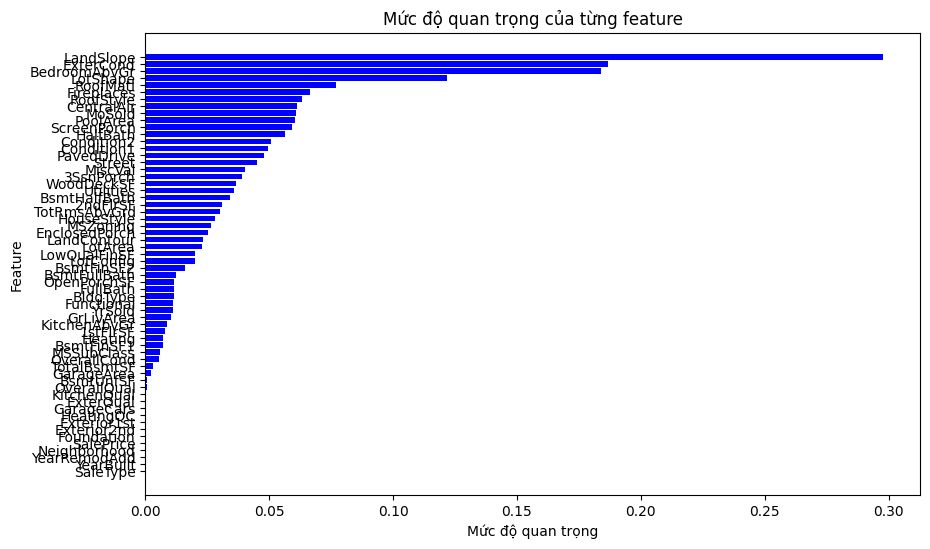

In [127]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# feature_importance.sort_values().plot(kind='barh', color='blue')  
plt.barh(feature_importance.index, feature_importance.sort_values(), color='blue')
plt.xlabel("Mức độ quan trọng")
plt.ylabel("Feature")
plt.title("Mức độ quan trọng của từng feature")
plt.show()


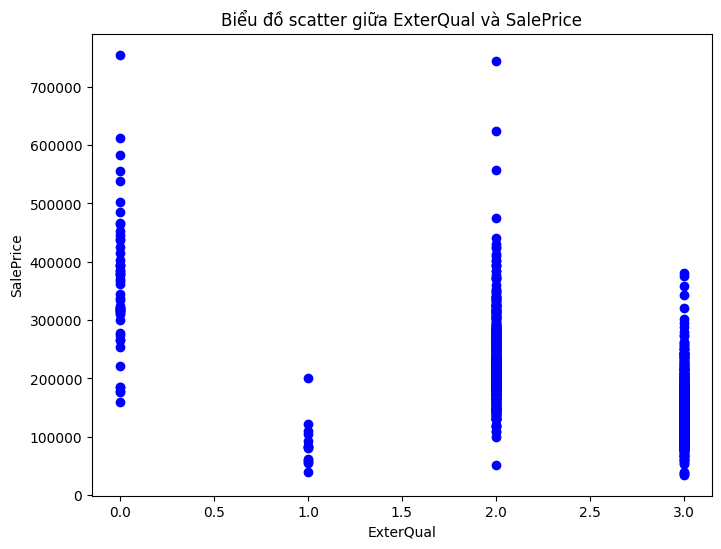

In [114]:
import seaborn as sns

x_label = df['ExterQual']
y_label = df['SalePrice']

# Vẽ scatter plot
plt.figure(figsize=(8,6))
plt.scatter(x_label, y_label, color='blue')
plt.xlabel(x_label.name)
plt.ylabel(y_label.name)
plt.title(f"Biểu đồ scatter giữa {x_label.name} và {y_label.name}")
plt.show()


In [128]:
selected_features = feature_importance[feature_importance > 0.01].index
X = X[selected_features]


In [129]:
print(X)
print(y)

      SaleType  YearBuilt  YearRemodAdd  ...  MSZoning  HouseStyle  TotRmsAbvGrd
0            8       2003          2003  ...         3           5             8
1            8       1976          1976  ...         3           2             6
2            8       2001          2002  ...         3           5             6
3            8       1915          1970  ...         3           5             7
4            8       2000          2000  ...         3           5             9
...        ...        ...           ...  ...       ...         ...           ...
1455         8       1999          2000  ...         3           5             7
1456         8       1978          1988  ...         3           2             7
1457         8       1941          2006  ...         3           5             9
1458         8       1950          1996  ...         3           2             5
1459         8       1965          1965  ...         3           2             6

[1460 rows x 38 columns]
0 

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [132]:
y_pred = model.predict(X_test)
print(y_pred)

['NOR' 'NOR' 'NOR' 'NOR' 'NOR' 'NOR' 'NOR' 'NOR' 'NOR' 'NOR' 'NOR' 'NOR'
 'ABN' 'NOR' 'NOR' 'NOR' 'NOR' 'NOR' 'NOR' 'NOR' 'NOR' 'NOR' 'NOR' 'NOR'
 'NOR' 'NOR' 'PAR' 'NOR' 'NOR' 'PAR' 'NOR' 'NOR' 'NOR' 'NOR' 'NOR' 'NOR'
 'NOR' 'NOR' 'NOR' 'NOR' 'NOR' 'NOR' 'NOR' 'PAR' 'NOR' 'NOR' 'NOR' 'NOR'
 'PAR' 'NOR' 'NOR' 'NOR' 'NOR' 'NOR' 'NOR' 'NOR' 'NOR' 'NOR' 'FAM' 'NOR'
 'NOR' 'NOR' 'NOR' 'PAR' 'PAR' 'NOR' 'NOR' 'NOR' 'ABN' 'NOR' 'FAM' 'NOR'
 'NOR' 'NOR' 'PAR' 'NOR' 'NOR' 'NOR' 'NOR' 'NOR' 'NOR' 'NOR' 'NOR' 'NOR'
 'NOR' 'NOR' 'PAR' 'NOR' 'NOR' 'PAR' 'NOR' 'NOR' 'NOR' 'NOR' 'NOR' 'PAR'
 'NOR' 'NOR' 'PAR' 'NOR' 'NOR' 'NOR' 'NOR' 'NOR' 'NOR' 'NOR' 'NOR' 'NOR'
 'NOR' 'NOR' 'ABN' 'NOR' 'NOR' 'NOR' 'NOR' 'NOR' 'NOR' 'NOR' 'FAM' 'NOR'
 'NOR' 'NOR' 'NOR' 'NOR' 'NOR' 'NOR' 'NOR' 'NOR' 'NOR' 'NOR' 'NOR' 'PAR'
 'NOR' 'NOR' 'ABN' 'NOR' 'PAR' 'NOR' 'NOR' 'NOR' 'NOR' 'NOR' 'NOR' 'NOR'
 'NOR' 'NOR' 'NOR' 'NOR' 'NOR' 'NOR' 'NOR' 'NOR' 'ABN' 'NOR' 'FAM' 'NOR'
 'ALC' 'NOR' 'NOR' 'NOR' 'NOR' 'ALC' 'PAR' 'NOR' 'A

In [133]:
confusion_matrix(y_test, y_pred)

array([[  5,   0,   0,   1,  18,   0],
       [  0,   0,   0,   0,   0,   0],
       [  1,   1,   1,   1,   1,   0],
       [  0,   0,   0,   0,   2,   0],
       [  8,   0,   1,   2, 222,   1],
       [  0,   0,   0,   0,   2,  25]], dtype=int64)

In [135]:
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average='micro'))
print(recall_score(y_test, y_pred, average='micro'))

0.8664383561643836
0.8664383561643836
0.8664383561643836
